In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import seaborn as sns #plotting

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score,classification_report # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORTING DATA

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df1 = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.drop('Time', axis = 1, inplace = True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

print(df1.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

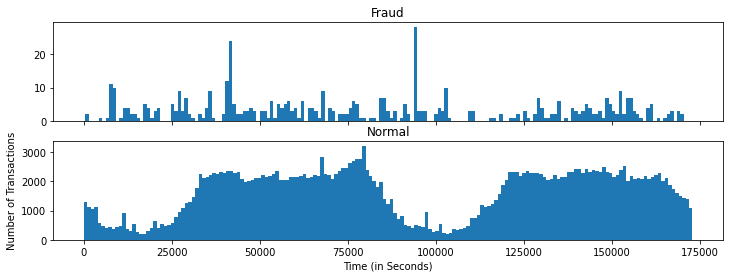

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 175

ax1.hist(df1.Time[df1.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df1.Time[df1.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

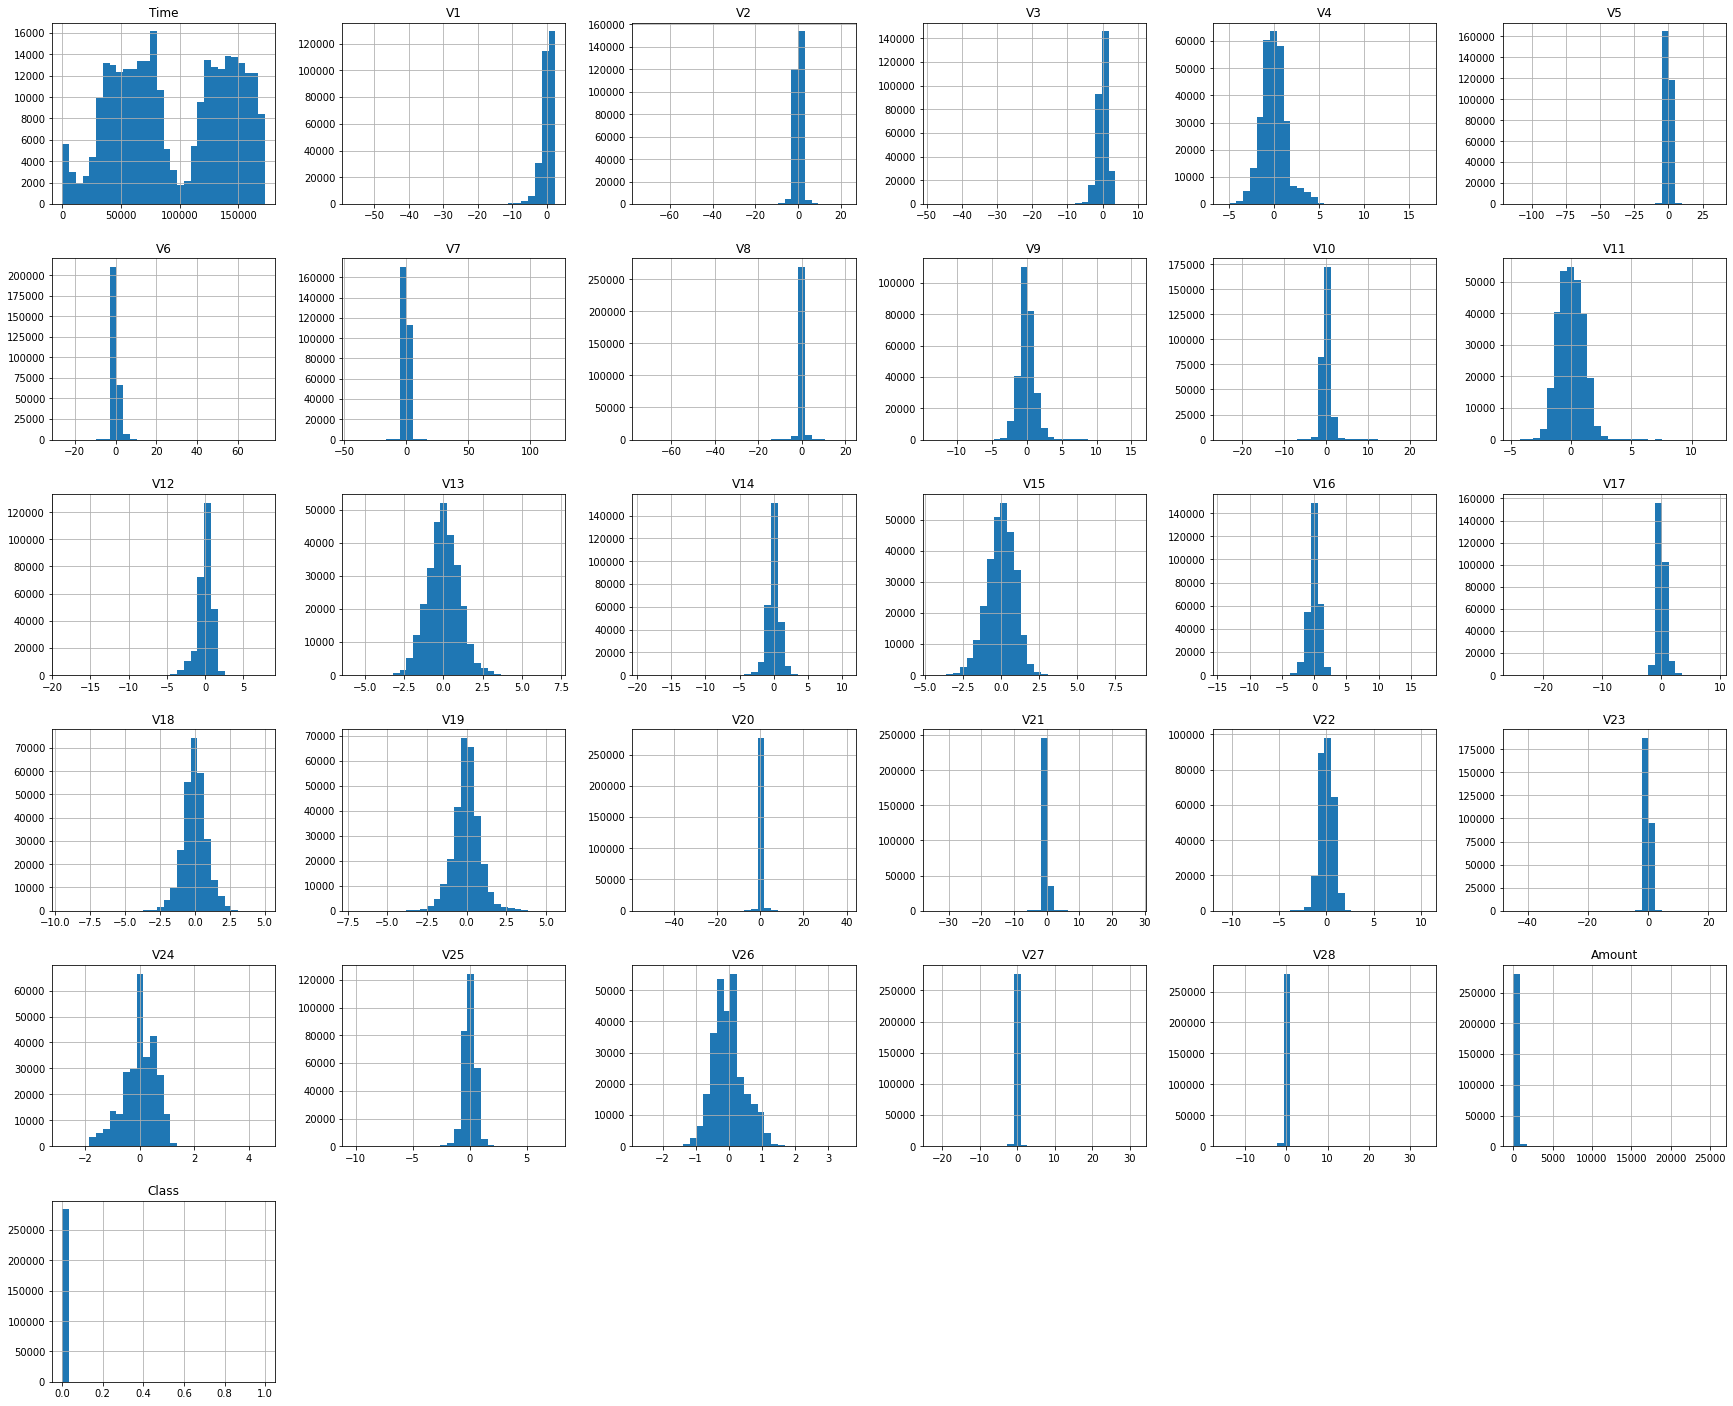

In [ ]:
df1.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

In [ ]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('--------------------------------------------')

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [ ]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('--------------------------------------------')
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())
print('--------------------------------------------')

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [ ]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [ ]:
# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

X_train samples :  [[-0.19007544  0.20332273 -0.99623247 -1.59698524  3.19257862  3.35693491
   0.28829931  0.8950028  -0.33002399 -0.64690044 -0.28278485  0.02324091
  -0.42109159  0.36824697 -0.15846484 -0.33475591 -0.33717992 -0.8420324
  -0.03301264 -0.00749606 -0.17059891 -0.61972354  0.03965129  0.70680517
  -0.16086971  0.27482465 -0.01054141  0.02219916 -0.29577689]]
X_test samples :  [[-0.611712   -0.76970532 -0.14975915 -0.2248765   2.02857736 -2.01988711
   0.29249139 -0.52302033  0.35846846  0.07004996 -0.85402278  0.54734736
   0.61644838 -0.10178502 -0.6084918  -0.28855943 -0.60619926 -0.90074552
  -0.20131116 -0.19603934 -0.07520776  0.04553605  0.38073938  0.02344032
  -2.22068576 -0.20114558  0.06650137  0.22117956 -0.34607282]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost Extreme Gradient

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)


In [ ]:
# 1. Accuracy score

print('ACCURACY SCORE')
print('------------------------------------------------------------------------')
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('------------------------------------------------------------------------')

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9994499256814484
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991456292499094
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.999403110845827
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992626663389628
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9995201479348805
------------------------------------------------------------------------


In [ ]:
# 2. F1 score

print('F1 SCORE')
print('------------------------------------------------------------------------')
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
print('------------------------------------------------------------------------')

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.7822580645161291
------------------------------------------------------------------------
F1 score of the KNN model is 0.8065843621399178
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.6812227074235807
------------------------------------------------------------------------
F1 score of the SVM model is 0.775330396475771
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7319148936170213
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8340080971659919
------------------------------------------------------------------------


In [ ]:

print('F1 SCORE')
#print(classification_report(y_test, tree_yhat))
print('------------------------------------------------------------------------')
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
print('------------------------------------------------------------------------')

F1 SCORE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.86      0.72      0.78       135

    accuracy                           1.00     85443
   macro avg       0.93      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.7822580645161291
------------------------------------------------------------------------
F1 score of the KNN model is 0.8065843621399178
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.6812227074235807
------------------------------------------------------------------------
F1 score of the SVM model is 0.775330396475771
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7319148936170213
-------------------